# Question 2: Clustering

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

d = fetch_openml('usps', version=2, as_frame=False)  # as_frame=False -> numpy arrays
Xtrain = np.asarray(d['data'], dtype=np.float32)
Ytrain = np.asarray(d['target'], dtype=np.int32)-1

### Data plotting function

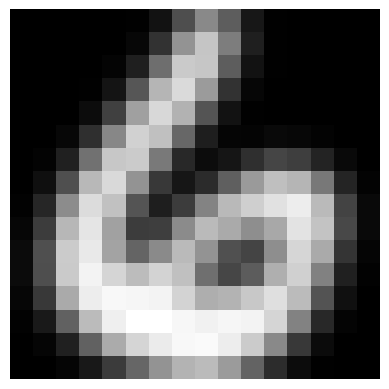

In [2]:
def plot(x):
    plt.imshow(x.reshape(16,16),cmap="grey")
    plt.axis(False)

plot(Xtrain[0,:])

### Question 1(a): Cluster Centers

Centroid of all data in Xtrain (for Q2a):


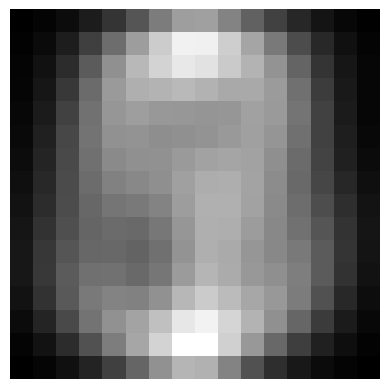

In [3]:
def cluster_center(X,ind):

    if len(ind) == 0:
        return np.zeros(X.shape[1])

    return X[ind].mean(axis=0)

all_indices = np.arange(Xtrain.shape[0])
mu = cluster_center(Xtrain, all_indices)

print("Centroid of all data in Xtrain (for Q2a):")
plt.figure()
plot(mu)
plt.savefig("q2a_centroid.png")
plt.show()

### Question 1(b): Cluster Objective

In [4]:
def cluster_objective(centers, X, z):
    assigned_centers = centers[z]

    total_ssd = np.sum((X - assigned_centers)**2)

    return total_ssd

centers_q2b = np.array([mu])

z_q2b = np.zeros(Xtrain.shape[0], dtype=int)

objective_val_q2b = cluster_objective(centers_q2b, Xtrain, z_q2b)

print(f"Objective function value for all data in one cluster (Q2b): {objective_val_q2b}")

Objective function value for all data in one cluster (Q2b): 631481.5625


### Question 1(c): K-Means

Running K-Means...
K-Means (K=10) Cluster Objective Value: 338838.125
K-Means: Plotting data cases per cluster...


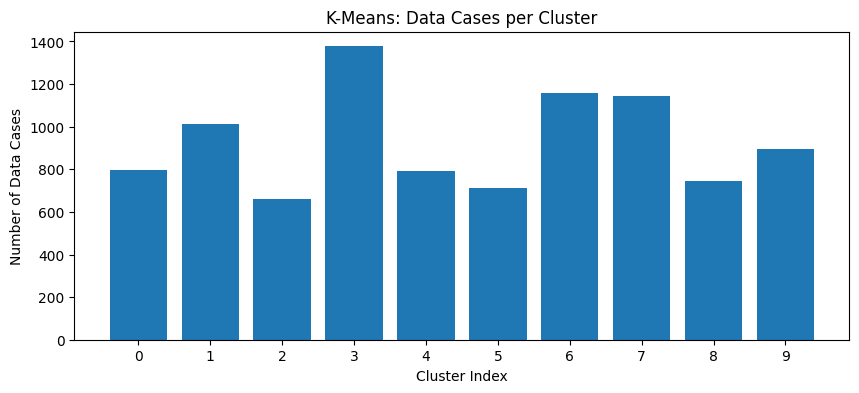

K-Means: Plotting cluster centroids...


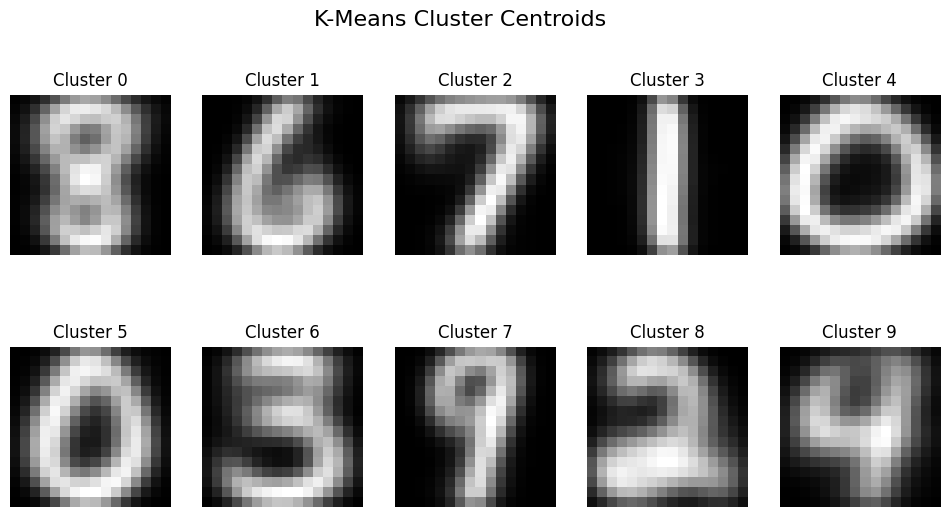

K-Means: Plotting true label distribution per cluster...


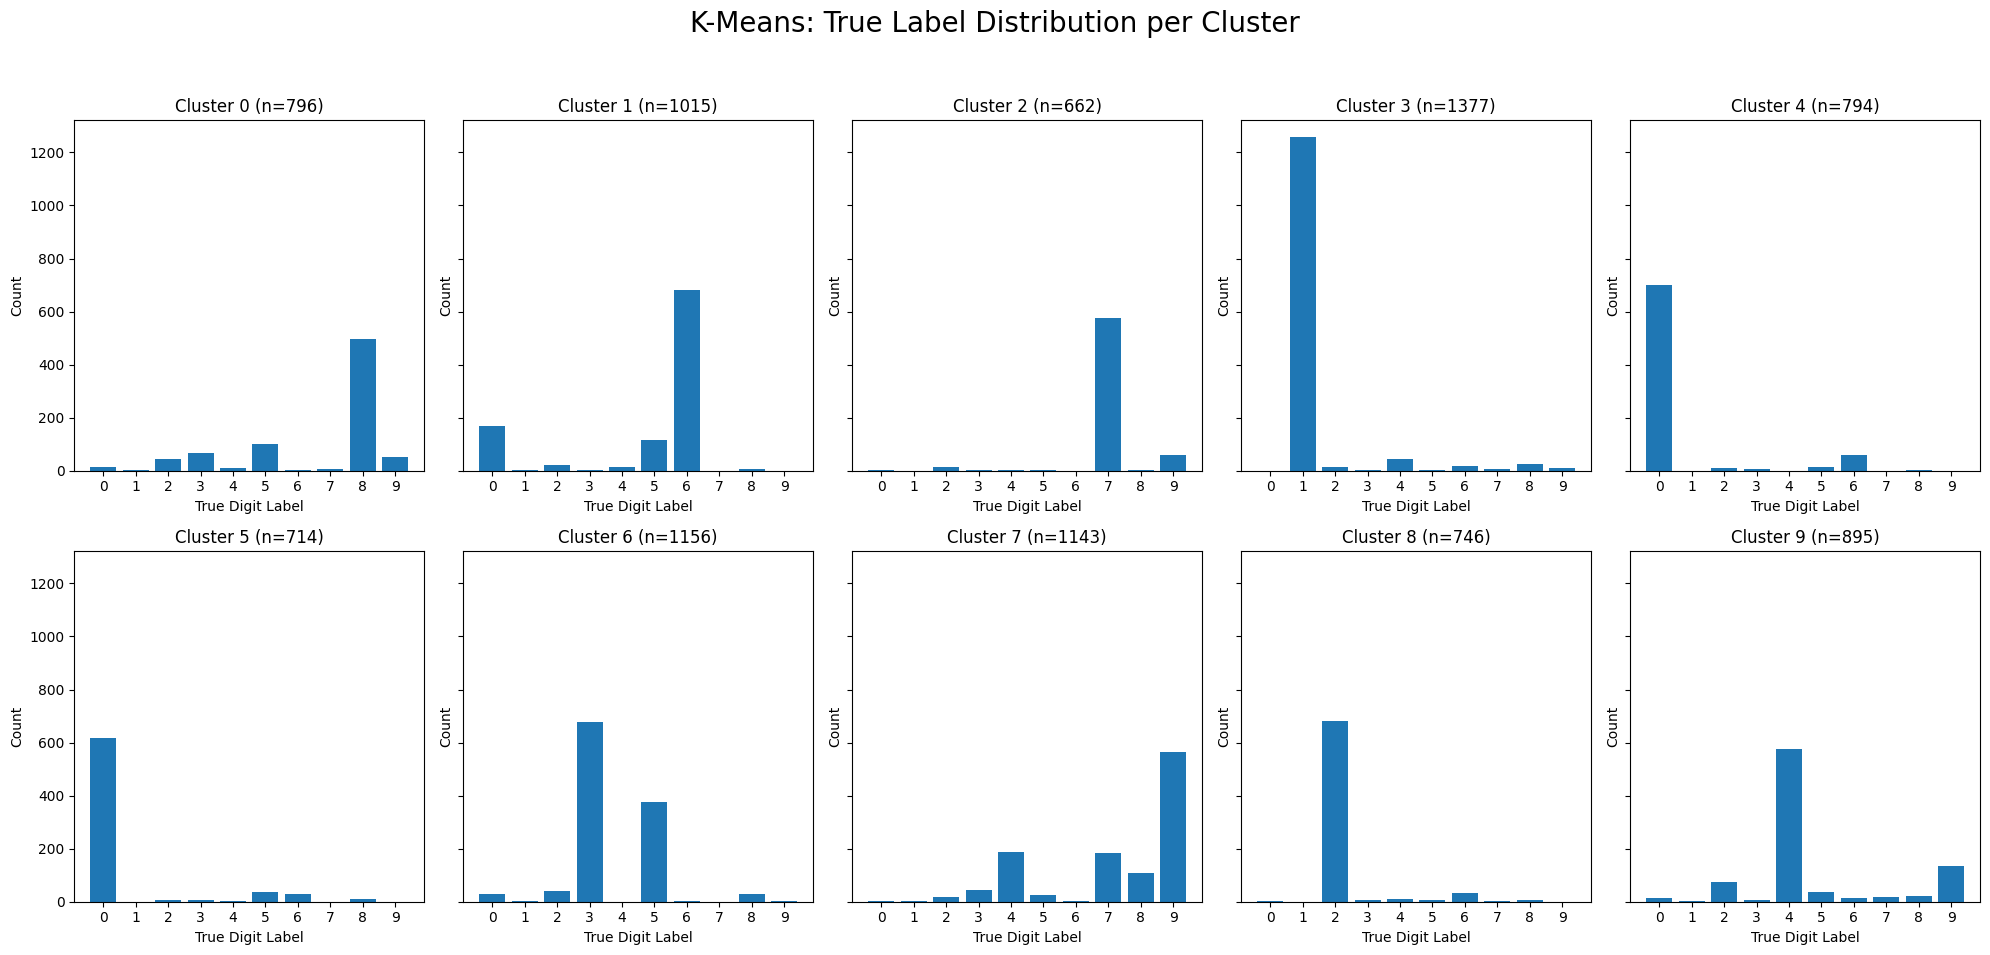

In [5]:
K = 10
N_INIT = 20
RANDOM_SEED = 42

print("Running K-Means...")
kmeans = KMeans(n_clusters=K, n_init=N_INIT, random_state=RANDOM_SEED)
kmeans.fit(Xtrain)

z_kmeans = kmeans.predict(Xtrain)

centers_kmeans = kmeans.cluster_centers_
objective_kmeans = cluster_objective(centers_kmeans, Xtrain, z_kmeans)
print(f"K-Means (K=10) Cluster Objective Value: {objective_kmeans}")

print("K-Means: Plotting data cases per cluster...")
cluster_counts_kmeans = np.bincount(z_kmeans)
plt.figure(figsize=(10, 4))
plt.bar(range(K), cluster_counts_kmeans)
plt.xlabel('Cluster Index')
plt.ylabel('Number of Data Cases')
plt.title('K-Means: Data Cases per Cluster')
plt.xticks(range(K))
plt.savefig("q2c_cluster_counts.png")
plt.show()

print("K-Means: Plotting cluster centroids...")
plt.figure(figsize=(12, 6))
for k in range(K):
    plt.subplot(2, 5, k + 1)
    plot(centers_kmeans[k])
    plt.title(f'Cluster {k}')
plt.suptitle('K-Means Cluster Centroids', fontsize=16)
plt.savefig("q2c_centroids.png")
plt.show()

print("K-Means: Plotting true label distribution per cluster...")
fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharey=True)
axes = axes.ravel()
for k in range(K):
    indices_k = np.where(z_kmeans == k)[0]
    if len(indices_k) > 0:
        labels_k = Ytrain[indices_k]
        label_counts = np.bincount(labels_k, minlength=10)

        axes[k].bar(range(10), label_counts)
        axes[k].set_title(f'Cluster {k} (n={len(indices_k)})')
        axes[k].set_xlabel('True Digit Label')
        axes[k].set_ylabel('Count')
        axes[k].set_xticks(range(10))
    else:
        axes[k].set_title(f'Cluster {k} (n=0)')

plt.suptitle('K-Means: True Label Distribution per Cluster', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("q2c_label_distributions.png")
plt.show()

### Question 1(d): Hierarchical Clustering

Running Hierarchical Agglomerative Clustering...
Computing centroids for Hierarchical Clustering...
Hierarchical (K=10, average linkage) Cluster Objective Value: 561044.1875
Hierarchical: Plotting data cases per cluster...


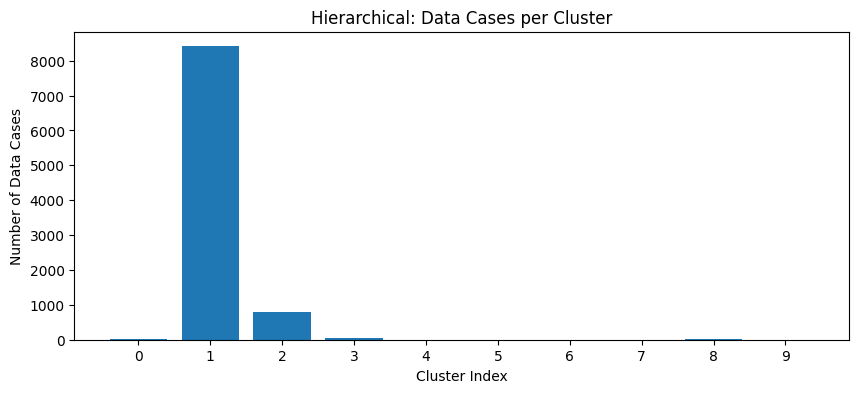

Hierarchical: Plotting cluster centroids...


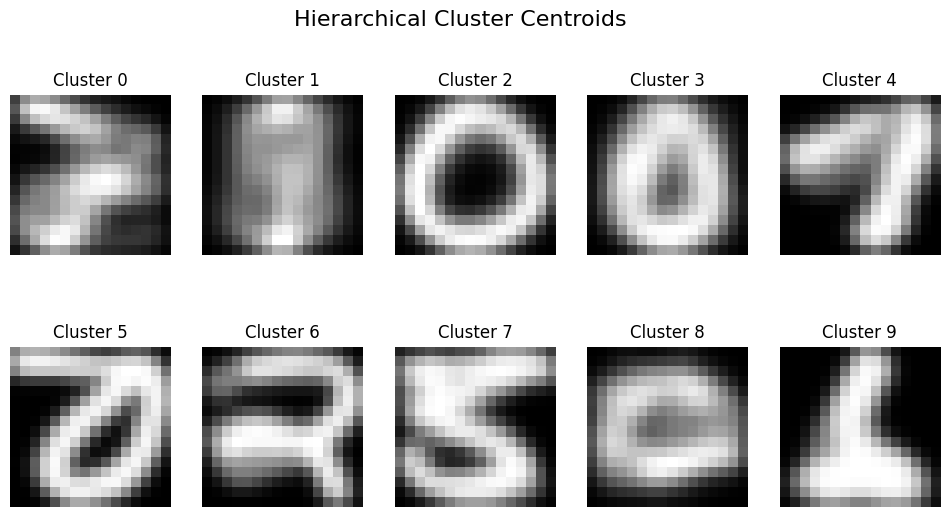

Hierarchical: Plotting true label distribution per cluster...


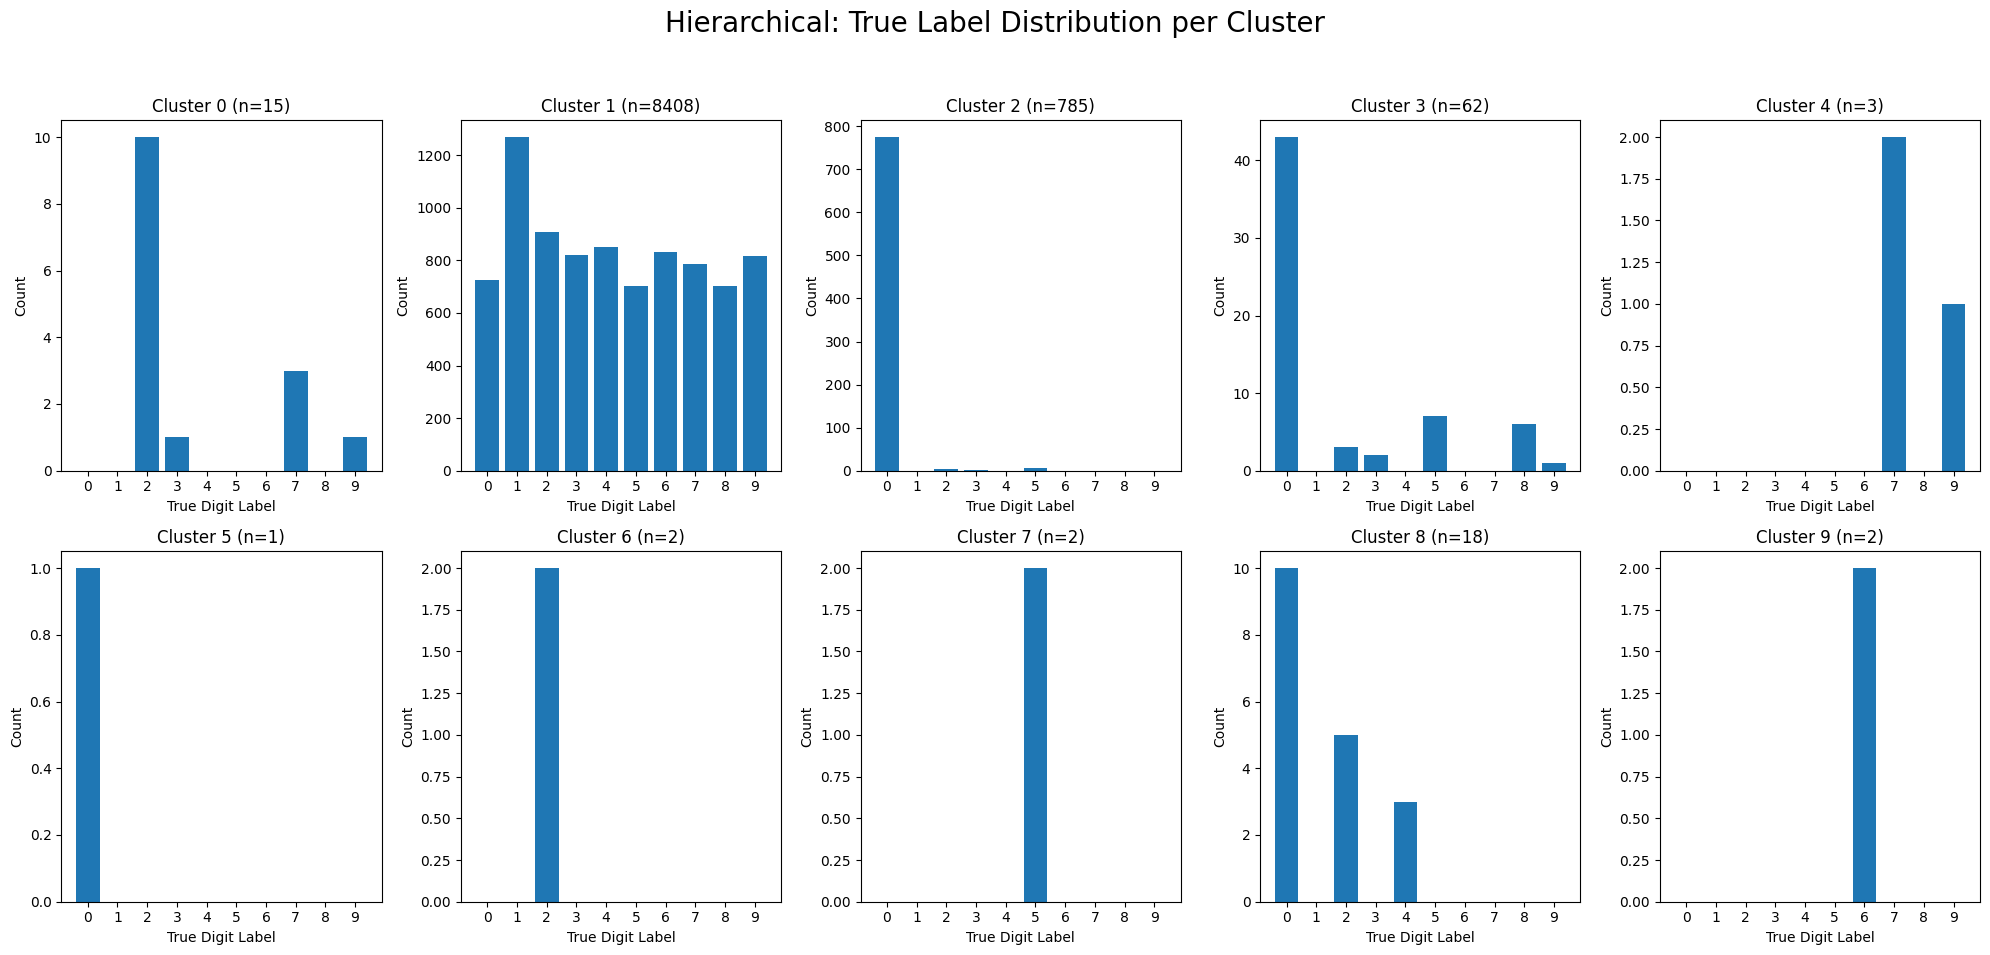

In [6]:
K = 10

print("Running Hierarchical Agglomerative Clustering...")
agg_cluster = AgglomerativeClustering(n_clusters=K, linkage='average')
z_agg = agg_cluster.fit_predict(Xtrain)

print("Computing centroids for Hierarchical Clustering...")
centers_agg = np.array([cluster_center(Xtrain, np.where(z_agg == k)[0]) for k in range(K)])
objective_agg = cluster_objective(centers_agg, Xtrain, z_agg)
print(f"Hierarchical (K=10, average linkage) Cluster Objective Value: {objective_agg}")

print("Hierarchical: Plotting data cases per cluster...")
cluster_counts_agg = np.bincount(z_agg)
plt.figure(figsize=(10, 4))
plt.bar(range(K), cluster_counts_agg)
plt.xlabel('Cluster Index')
plt.ylabel('Number of Data Cases')
plt.title('Hierarchical: Data Cases per Cluster')
plt.xticks(range(K))
plt.savefig("q2d_cluster_counts.png")
plt.show()

print("Hierarchical: Plotting cluster centroids...")
plt.figure(figsize=(12, 6))
for k in range(K):
    plt.subplot(2, 5, k + 1)
    plot(centers_agg[k])
    plt.title(f'Cluster {k}')
plt.suptitle('Hierarchical Cluster Centroids', fontsize=16)
plt.savefig("q2d_centroids.png")
plt.show()

print("Hierarchical: Plotting true label distribution per cluster...")
fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharey=False)
axes = axes.ravel()
for k in range(K):
    indices_k = np.where(z_agg == k)[0]
    if len(indices_k) > 0:
        labels_k = Ytrain[indices_k]
        label_counts = np.bincount(labels_k, minlength=10)

        axes[k].bar(range(10), label_counts)
        axes[k].set_title(f'Cluster {k} (n={len(indices_k)})')
        axes[k].set_xlabel('True Digit Label')
        axes[k].set_ylabel('Count')
        axes[k].set_xticks(range(10))
    else:
        axes[k].set_title(f'Cluster {k} (n=0)')

plt.suptitle('Hierarchical: True Label Distribution per Cluster', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("q2d_label_distributions.png")
plt.show()